In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/research-summer2020/code')
import globals

globals.initialize_vals()  # brings in all the default parameters

periodic = globals.periodic
rmin = globals.rmin
rmax = globals.rmax
nbins = globals.nbins
nthreads = globals.nthreads

In [2]:
nmocks = 401
nbins = 20
r_edges = np.linspace(rmin, rmax, nbins+1) 

In [3]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'

#### true correlation function

In [4]:
r_t, cf_true = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_Rh_xi.txt', unpack=True)
cf_true_ln = 4*cf_true

In [5]:
path_ls = f'/scratch/aew492/research-summer2020_output/lognormal/xi/ls/{cat_tag}'
xis_ls = np.empty((nmocks, 22))

for i in range(nmocks):
    xi_ls = np.load(os.path.join(path_ls, f'xi_cat_{cat_tag}_lognormal_rlz{i}.npy'), allow_pickle=True)
    xis_ls[i] = xi_ls[1]

avg_xi_ls = np.array([xi_ls[0], np.mean(xis_ls, axis=0)]).T

#### fixed bao basis

In [6]:
path_bao = f'/scratch/aew492/research-summer2020_output/lognormal/xi/bao_fixed/{cat_tag}/'
xis_suave_bao = np.empty((nmocks, 1000))

for i in range(nmocks):
    xi_suave_bao = np.load(os.path.join(path_bao, f'xi_cat_{cat_tag}_lognormal_rlz{i}.npy'), allow_pickle=True)
    xis_suave_bao[i] = xi_suave_bao[:,1]

avg_xi_suave_bao = np.array([xi_suave_bao[:,0], np.mean(xis_suave_bao, axis=0)]).T

#### iterative bao basis

In [7]:
path_bao_it = f'/scratch/aew492/research-summer2020_output/lognormal/xi/bao_iterative/{cat_tag}/'

In [8]:
xis_suave_it = np.empty((nmocks, 2000))

for i in range(nmocks):
    xi_suave_it = np.load(os.path.join(path_bao_it, f'xi_baoiter_cosmoplanck15_test_trrnum_3x_{cat_tag}_rlz{i}.npy'), allow_pickle=True)
    xis_suave_it[i] = xi_suave_it[1]

avg_xi_suave_it = np.array([xi_suave_it[0], np.mean(xis_suave_it, axis=0)]).T

#### plot

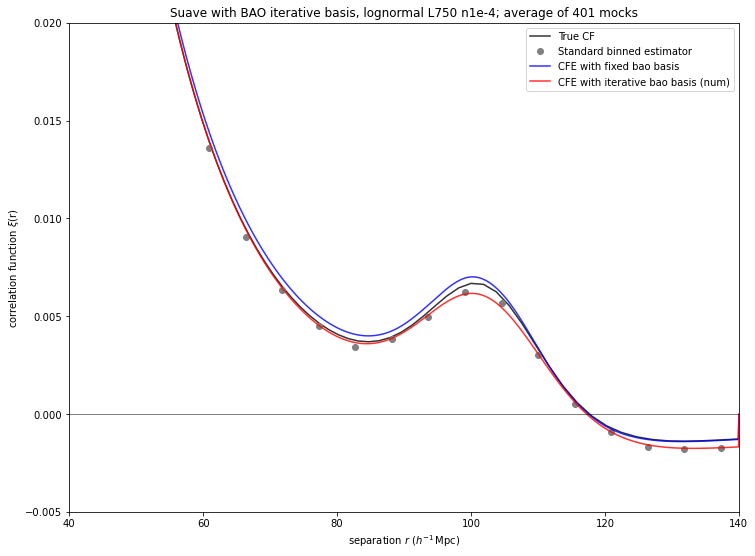

In [18]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(r_t, cf_true_ln, color='k', lw=1.5, alpha=0.8, label='True CF')
plt.plot(avg_xi_ls[:,0], avg_xi_ls[:,1], marker='o', ls='None', color='grey', label='Standard binned estimator')
plt.plot(avg_xi_suave_bao[:,0], avg_xi_suave_bao[:,1], color='b', lw=1.5, alpha=0.8, label='CFE with fixed bao basis')
plt.plot(avg_xi_suave_it[:,0], avg_xi_suave_it[:,1], color='r', lw=1.5, alpha=0.8, label='CFE with iterative bao basis (num)')

ax.set_xlim(40, 140)
ax.set_ylim(-.005, 0.02)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'Suave with BAO iterative basis, lognormal L750 n1e-4; average of {nmocks} mocks')
plt.legend()